In [58]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/clustering_1_3008.csv')
data.head()

,age,sex,profession,income
0,33.0,female,worker,91786.0
1,34.0,female,unemployed,46724.0
2,42.0,female,homewife,51351.0
3,29.0,female,unemployed,47083.0
4,37.0,female,worker,91562.0


In [5]:
data.shape

(10000, 4)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         9521 non-null   float64
 1   sex         9521 non-null   object 
 2   profession  10000 non-null  object 
 3   income      10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [6]:
data.describe()

,age,income
count,9521.000000,10000.000000
mean,34.965760,77494.399100
std,4.998853,28965.823446
min,18.000000,46042.000000
25%,32.000000,51613.000000
50%,35.000000,66724.000000
75%,38.000000,111429.000000
max,55.000000,200000.000000


In [7]:
data.isnull().sum()

age           479
sex           479
profession      0
income          0
dtype: int64

Для количественных переменных построить диаграммы рассеяния и рассчитать статистику (среднее значение, размах, число вариантов и др.).

In [15]:
print(f"Среднее значение возраста: {data['age'].mean()}")
print(f"Размах возраста: {data['age'].std()}")
print(f"Число уникальных значений возраста: {len(data['age'].value_counts())}")


Среднее значение возраста: 34.96575989917026
Размах возраста: 4.998853205956189
Число уникальных значений возраста: 37


In [16]:
print(f"Среднее значение дохода: {data['income'].mean()}")
print(f"Размах дохода: {data['income'].std()}")
print(f"Число уникальных значений дохода: {len(data['income'].value_counts())}")

Среднее значение дохода: 77494.3991
Размах дохода: 28965.82344605466
Число уникальных значений дохода: 170


In [27]:
data.describe(include='object')

,sex,profession
count,9521,10000
unique,2,3
top,female,worker
freq,5413,4298


Для количественных признаков построить диаграммы рассеяния и диаграммы Box-and-Whisker, для категориальных признаков – гистограммы частот вариантов. Сделать выводы о характере распределений признаков, наличии выбросов.
В исходном датасете количественным признаком является только 'age'

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

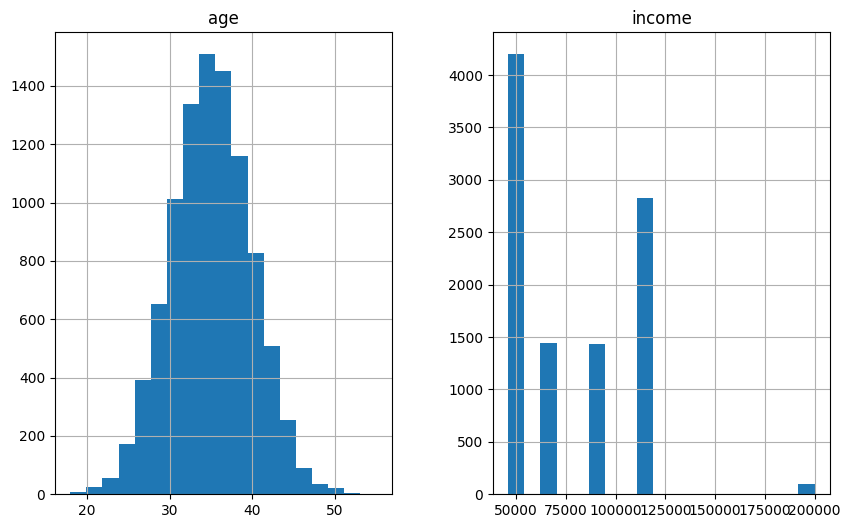

In [8]:
data.hist(figsize=(10, 6), bins=19)

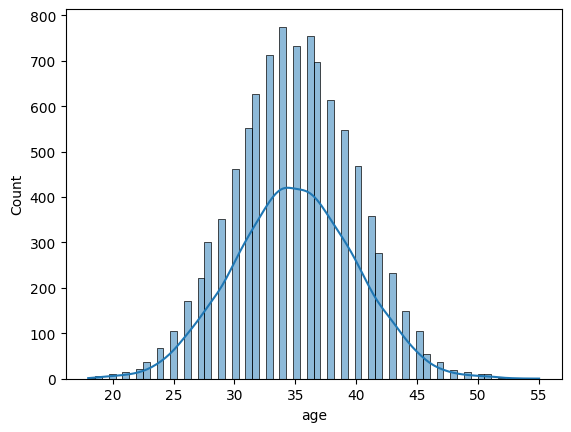

In [19]:
sns.histplot(data['age'], kde=True)
plt.show()

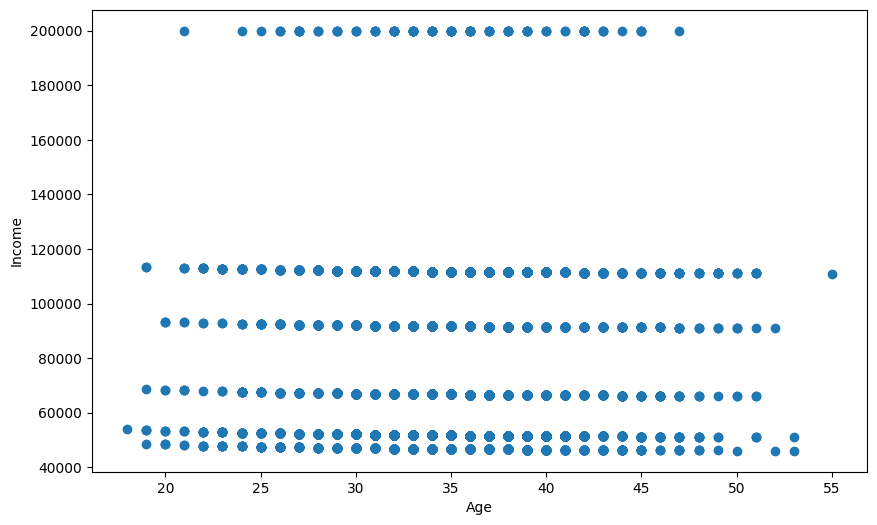

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['age'], y = data['income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [10]:
def show_box_and_whisker(data, by):
    data.boxplot(column='age', by=by)
    plt.xlabel("Age")
    plt.ylabel("Income")
    plt.show()

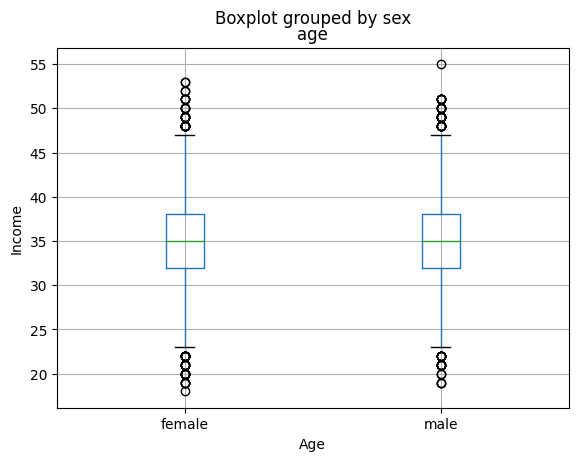

In [23]:
show_box_and_whisker(data, 'sex')

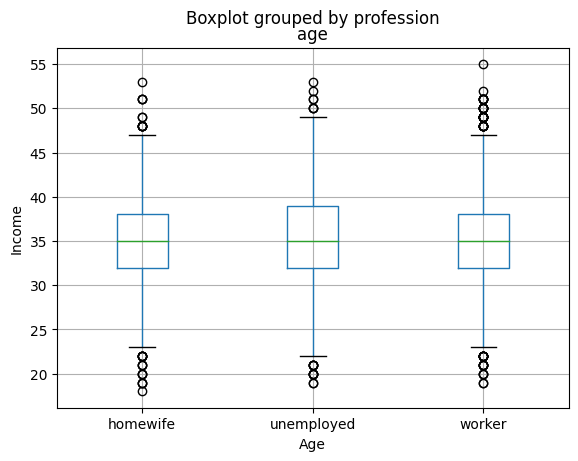

In [29]:
show_box_and_whisker(data, 'profession')

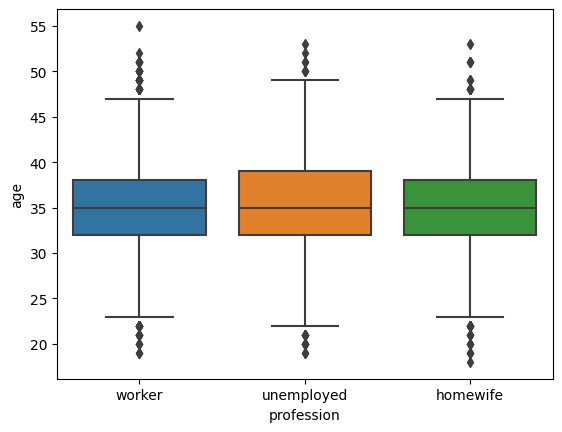

In [25]:
sns.boxplot(x="profession", y="age", data=data)
plt.show()

Распределение признаков

<Axes: >

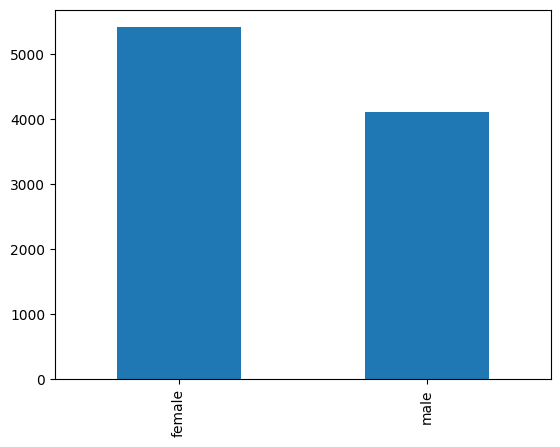

In [30]:
data.sex.value_counts().plot(kind='bar')

<Axes: >

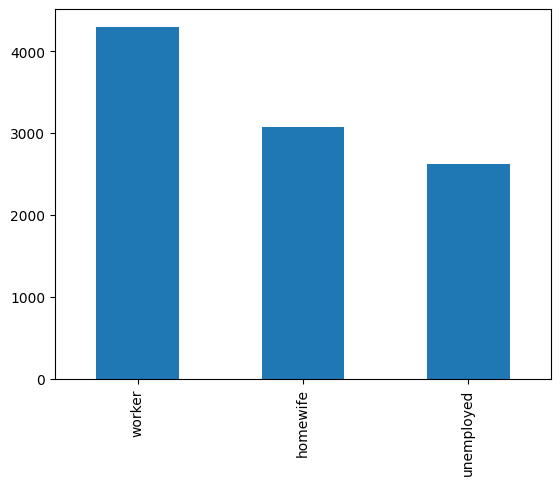

In [31]:
data.profession.value_counts().plot(kind='bar')

<Axes: >

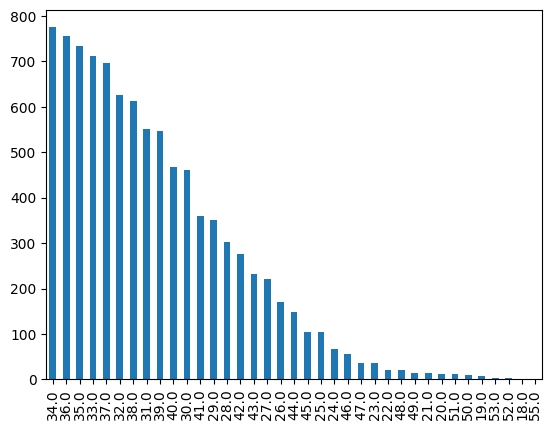

In [33]:
data.age.value_counts().plot(kind='bar')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         9521 non-null   float64
 1   sex         9521 non-null   object 
 2   profession  10000 non-null  object 
 3   income      10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


Обучение Модели

In [53]:
data.isna().sum()

age           479
sex           479
profession      0
income          0
dtype: int64

In [54]:
data = data.dropna()
data.shape

(9521, 4)

In [55]:
encoded_features = pd.get_dummies(data[['sex', 'profession']], drop_first=True)
encoded_df = pd.concat([data[['age', 'income']], encoded_features], axis=1)
encoded_df.head()

,age,income,sex_male,profession_unemployed,profession_worker
0,33.0,91786.0,0,0,1
1,34.0,46724.0,0,1,0
2,42.0,51351.0,0,0,0
3,29.0,47083.0,0,1,0
4,37.0,91562.0,0,0,1


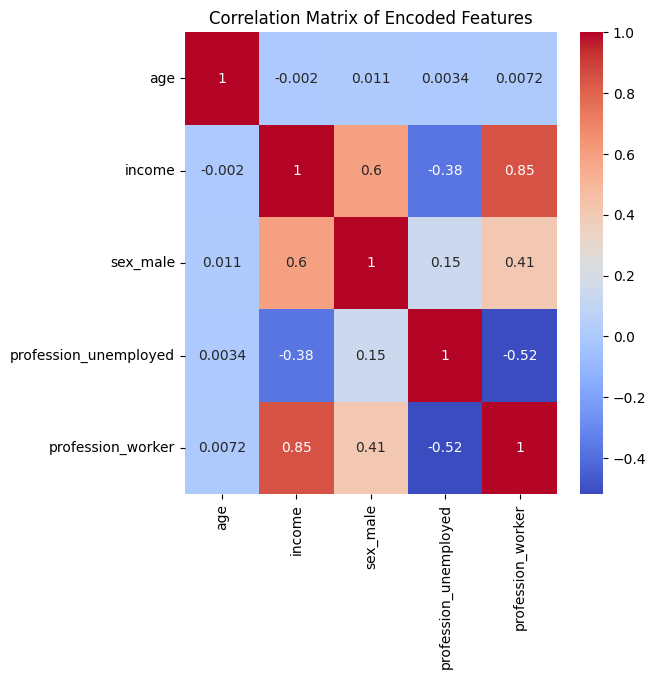

In [56]:
correlation_matrix = encoded_df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Encoded Features")
plt.show()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, encoded_df['income'], test_size=0.3, shuffle=False)

In [98]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
print(principal_components)

[[-1.71732061e+04  2.19252726e+00]
 [-6.22352061e+04  1.42987019e+00]
 [-5.76082061e+04 -6.59436464e+00]
 [-6.18762061e+04  6.42788454e+00]
 [-1.73972061e+04 -1.80622019e+00]
 [-1.76432061e+04 -7.80481980e+00]
 [-5.71072061e+04  3.40281763e+00]
 [-6.24882061e+04 -3.56870765e+00]
 [-5.75302061e+04 -4.59481017e+00]
 [-1.73462061e+04 -8.06506746e-01]
 [-5.63272060e+04  1.13985476e+01]
 [-1.71072061e+04  3.19216096e+00]
 [-6.20362061e+04  4.42876598e+00]
 [-5.72352061e+04  1.40352896e+00]
 [-5.73462061e+04 -5.95850077e-01]
 [-5.71732061e+04  2.40318393e+00]
 [-1.70362061e+04  4.19176809e+00]
 [-5.76772062e+04 -8.59396695e+00]
 [-5.69592061e+04  5.40199998e+00]
 [ 9.10407939e+04  9.61491771e+00]
 [-6.24442061e+04 -2.56895700e+00]
 [-5.72922061e+04  4.03847417e-01]
 [-6.16862061e+04  8.42684362e+00]
 [-5.73972061e+04 -1.59556352e+00]
 [-5.67852061e+04  7.40104412e+00]
 [-5.75702061e+04 -5.59458209e+00]
 [-6.19592061e+04  5.42834121e+00]
 [-1.72922061e+04  1.93190749e-01]
 [-6.27692062e+04 -1

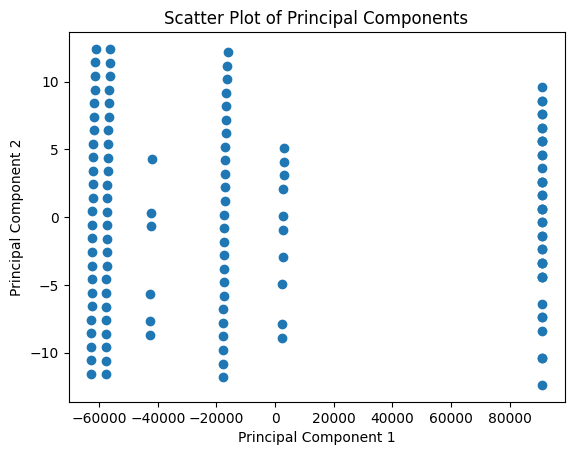

In [99]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()

In [100]:
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(principal_components)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [101]:
silhouette_avg = silhouette_score(principal_components, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.8941810441915532


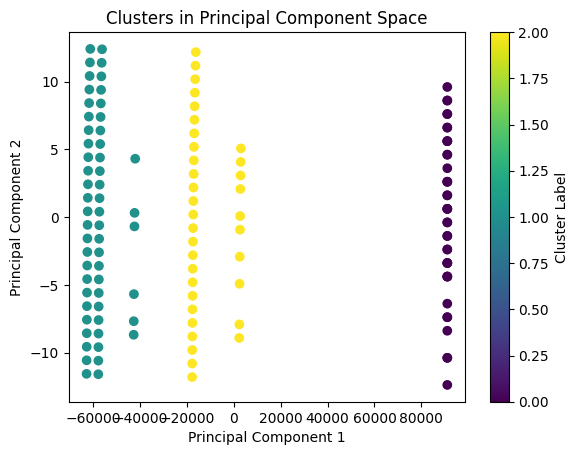

In [102]:
# Визуализация кластеров
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in Principal Component Space')
plt.colorbar(label='Cluster Label')
plt.show()

# Улучшение базовой модели

Выбрать метод и провести восстановление пропущенных значений в обучающей выборке.



In [76]:
data1 = pd.read_csv('/content/clustering_1_3008.csv')
data1.head()

,age,sex,profession,income
0,33.0,female,worker,91786.0
1,34.0,female,unemployed,46724.0
2,42.0,female,homewife,51351.0
3,29.0,female,unemployed,47083.0
4,37.0,female,worker,91562.0


In [89]:
data1['age'] = data1['age'].fillna(data1['age'].mean()).round(0)

In [90]:
data1['sex'] = data1['sex'].fillna(np.random.choice(['male','female']))

In [91]:
data1.isnull().sum()

age           0
sex           0
profession    0
income        0
dtype: int64

In [92]:
q1 = data1['age'].quantile(0.25)
q3 = data1['age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data1 = data1[(data['age'] >= lower_bound) & (data1['age'] <= upper_bound)]

In [93]:
print(data1.duplicated().sum())
data1.drop_duplicates(inplace=True)
print(data1.duplicated().sum())
data1.shape

0
0


(188, 4)

In [94]:
encoded_features = pd.get_dummies(data1[['sex', 'profession']], drop_first=True)
encoded_df = pd.concat([data1[['age', 'income']], encoded_features], axis=1)
encoded_df.head()

,age,income,sex_male,profession_unemployed,profession_worker
0,33.0,91786.0,0,0,1
1,34.0,46724.0,0,1,0
2,42.0,51351.0,0,0,0
3,29.0,47083.0,0,1,0
4,37.0,91562.0,0,0,1


In [83]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop('income', axis=1), encoded_df['income'], test_size=0.2, shuffle=False)

In [84]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

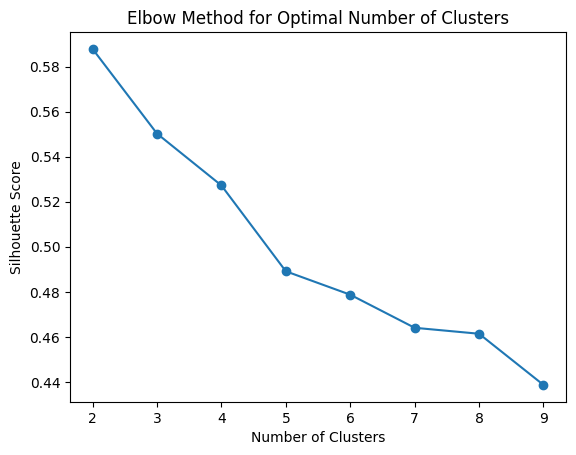

In [85]:
num_clusters = range(2, 10)

silhouette_scores = []

for num in num_clusters:
    kmeans = KMeans(n_clusters=num)
    cluster_labels = kmeans.fit_predict(principal_components)
    silhouette_avg = silhouette_score(principal_components, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [88]:
from sklearn.cluster import DBSCAN
import itertools

eps_values = [x/10 for x in range(1, 100)]
min_samples_values = [2, 3, 4, 5, 6]

best_silhouette_score = 0.99
best_params = {}

for eps, min_samples in itertools.product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(principal_components)
    num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    if num_clusters > 10:
        break
    silhouette_avg = silhouette_score(principal_components, cluster_labels)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_params = {'eps': eps, 'min_samples': min_samples, 'num_clusters': num_clusters}

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best Parameters: {best_params}")

Best Silhouette Score: 0.99
Best Parameters: {}


In [103]:
# Найдем индекс признака с наибольшей корреляцией с первой главной компонентой
feature_index_with_max_correlation = np.argmax(np.abs(top_eigenvectors[:, 0]))

# Выведем имя этого признака
most_correlated_feature = f"Feature {feature_index_with_max_correlation + 1}"
print(f"The most correlated feature with the 1st principal component is: {most_correlated_feature}")


The most correlated feature with the 1st principal component is: Feature 4


In [104]:
# Найдем индекс признака с наибольшей корреляцией с второй главной компонентой
feature_index_with_max_correlation_2nd = np.argmax(np.abs(top_eigenvectors[:, 1]))

# Выведем имя этого признака
most_correlated_feature_2nd = f"Feature {feature_index_with_max_correlation_2nd + 1}"
print(f"The most correlated feature with the 2nd principal component is: {most_correlated_feature_2nd}")

The most correlated feature with the 2nd principal component is: Feature 1


In [105]:
# Найдем индексы точек в нулевом кластере
cluster_0_indices = np.where(cluster_labels == 0)[0]

# Вычислим среднее значение первой главной компоненты для точек в нулевом кластере
mean_1st_principal_component_cluster_0 = np.mean(X_pca[cluster_0_indices, 0])

# Округлим до целого числа
rounded_mean_1st_principal_component_cluster_0 = int(round(mean_1st_principal_component_cluster_0))

print(f"Mean 1st Principal Component in Cluster 0: {rounded_mean_1st_principal_component_cluster_0}")


Mean 1st Principal Component in Cluster 0: 0


In [106]:
# Найдем индексы точек в первом кластере
cluster_1_indices = np.where(cluster_labels == 1)[0]

# Вычислим среднее значение первой главной компоненты для точек в первом кластере
mean_1st_principal_component_cluster_1 = np.mean(X_pca[cluster_1_indices, 0])

# Округлим до целого числа
rounded_mean_1st_principal_component_cluster_1 = int(round(mean_1st_principal_component_cluster_1))

print(f"Mean 1st Principal Component in Cluster 1: {rounded_mean_1st_principal_component_cluster_1}")


Mean 1st Principal Component in Cluster 1: 0


In [107]:
# Найдем индексы точек во втором кластере
cluster_2_indices = np.where(cluster_labels == 2)[0]

# Вычислим среднее значение первой главной компоненты для точек во втором кластере
mean_1st_principal_component_cluster_2 = np.mean(X_pca[cluster_2_indices, 0])

# Округлим до целого числа
rounded_mean_1st_principal_component_cluster_2 = int(round(mean_1st_principal_component_cluster_2))

print(f"Mean 1st Principal Component in Cluster 2: {rounded_mean_1st_principal_component_cluster_2}")

Mean 1st Principal Component in Cluster 2: 0


In [108]:
# Вычислим среднее значение второй главной компоненты для точек в нулевом кластере
mean_2nd_principal_component_cluster_0 = np.mean(X_pca[cluster_0_indices, 1])

# Округлим до целого числа
rounded_mean_2nd_principal_component_cluster_0 = int(round(mean_2nd_principal_component_cluster_0))

print(f"Mean 2nd Principal Component in Cluster 0: {rounded_mean_2nd_principal_component_cluster_0}")

Mean 2nd Principal Component in Cluster 0: 0


In [109]:
np.argmax(np.abs(pca.components_[0]))

1

In [110]:
np.argmax(np.abs(pca.components_[1]))

0

In [111]:
print(pca.components_)

[[-5.31198827e-06  1.00000000e+00 -4.31198710e-07 -1.18442348e-06
   7.88548363e-07]
 [-9.99984558e-01 -5.31598880e-06 -5.18604092e-03 -2.38716551e-04
   1.98288363e-03]]


In [ ]:

age	income	sex_male	profession_unemployed	profession_worker